## Selenium 사용하기

In [1]:
from selenium import webdriver

In [2]:
driver = webdriver.Chrome('./chromedriver')
driver.get('http://naver.com')

In [3]:
driver.save_screenshot('./001.jpg')

/anaconda3/lib/python3.7/site-packages/selenium/webdriver/remote/webdriver.py:1031: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  "type. It should end with a `.png` extension", UserWarning)


True

In [4]:
import os

driver.get('https://nid.naver.com/nidlogin.login?mode=form&url=https%3A%2F%2Fwww.naver.com')

elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys(os.environ['NAVER_ID'])

elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys(os.environ['NAVER_PASSWORD'])

In [5]:
xpath = '''//*[@id="frmNIDLogin"]/fieldset/input'''
driver.find_element_by_xpath(xpath).click()

In [10]:
driver.get('http://mail.naver.com')

In [11]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [12]:
raw_list = soup.find_all('div', 'name _ccr(lst.from)')
raw_list

[<div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|1367) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|1366) _stopDefault" href="#" title='"네이버" &lt;help@help.naver.com&gt;'>네이버</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|1364) _stopDefault" href="#" title='"(주)KRT여행사" &lt;webmaster@krt.co.kr&gt;'>(주)KRT여행사</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|1363) _stopDefault" href="#" title='"(주)KRT여행사" &lt;webmaster@krt.co.kr&gt;'>(주)KRT여행사</a></div>,
 <div class="name _ccr(lst.from)"><span class="blind">보낸 이:</span><a class="_c1(myContextMenu|showSenderContextLayer|list|1362) _stopDefault" hr

In [13]:
send_list = [raw_list[n].find('a').get_text() for n in range(0, len(raw_list))]
send_list

['네이버',
 '네이버',
 '(주)KRT여행사',
 '(주)KRT여행사',
 'Twitter',
 'edwith - Course Staf..',
 'edwith - Course Staf..',
 '(주)KRT여행사',
 '아마존웹서비스',
 '(주)KRT여행사',
 'Twitter',
 'Microsoft',
 'edwith - Course Staf..',
 'edwith - Course Staf..',
 '(주)KRT여행사']

In [14]:
driver.close()

## 서울시 구별 주유소 가격 정보 얻기

In [48]:
driver = webdriver.Chrome('./chromedriver')
driver.get("https://www.opinet.co.kr/searRgSelect.do")
driver.get("https://www.opinet.co.kr/searRgSelect.do")

In [49]:
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [50]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [51]:
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [52]:
xpath = '//*[@id="searRgSelect"]'
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [53]:
xpath = '//*[@id="glopopd_excel"]'
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [54]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    
    time.sleep(2)
    
    element_sel_gu = driver.find_element_by_xpath('//*[@id="searRgSelect"]').click()
    
    time.sleep(1)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    
    time.sleep(1)

In [78]:
driver.close()

## 구별 주유 가격에 대한 데이터의 정리

In [55]:
import pandas as pd
from glob import glob

In [57]:
glob('./지역*.xls')

['./지역_위치별(주유소) (9).xls',
 './지역_위치별(주유소) (12).xls',
 './지역_위치별(주유소) (5).xls',
 './지역_위치별(주유소) (24).xls',
 './지역_위치별(주유소) (25).xls',
 './지역_위치별(주유소) (4).xls',
 './지역_위치별(주유소) (13).xls',
 './지역_위치별(주유소) (8).xls',
 './지역_위치별(주유소) (3).xls',
 './지역_위치별(주유소) (18).xls',
 './지역_위치별(주유소) (22).xls',
 './지역_위치별(주유소) (14).xls',
 './지역_위치별(주유소) (15).xls',
 './지역_위치별(주유소) (23).xls',
 './지역_위치별(주유소) (19).xls',
 './지역_위치별(주유소) (2).xls',
 './지역_위치별(주유소) (20).xls',
 './지역_위치별(주유소) (1).xls',
 './지역_위치별(주유소) (16).xls',
 './지역_위치별(주유소) (17).xls',
 './지역_위치별(주유소) (21).xls',
 './지역_위치별(주유소) (10).xls',
 './지역_위치별(주유소) (7).xls',
 './지역_위치별(주유소) (6).xls',
 './지역_위치별(주유소) (11).xls']

In [58]:
station_files = glob('./지역*.xls')
station_files

['./지역_위치별(주유소) (9).xls',
 './지역_위치별(주유소) (12).xls',
 './지역_위치별(주유소) (5).xls',
 './지역_위치별(주유소) (24).xls',
 './지역_위치별(주유소) (25).xls',
 './지역_위치별(주유소) (4).xls',
 './지역_위치별(주유소) (13).xls',
 './지역_위치별(주유소) (8).xls',
 './지역_위치별(주유소) (3).xls',
 './지역_위치별(주유소) (18).xls',
 './지역_위치별(주유소) (22).xls',
 './지역_위치별(주유소) (14).xls',
 './지역_위치별(주유소) (15).xls',
 './지역_위치별(주유소) (23).xls',
 './지역_위치별(주유소) (19).xls',
 './지역_위치별(주유소) (2).xls',
 './지역_위치별(주유소) (20).xls',
 './지역_위치별(주유소) (1).xls',
 './지역_위치별(주유소) (16).xls',
 './지역_위치별(주유소) (17).xls',
 './지역_위치별(주유소) (21).xls',
 './지역_위치별(주유소) (10).xls',
 './지역_위치별(주유소) (7).xls',
 './지역_위치별(주유소) (6).xls',
 './지역_위치별(주유소) (11).xls']

In [59]:
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [60]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 21
Data columns (total 10 columns):
지역       506 non-null object
상호       506 non-null object
주소       506 non-null object
상표       506 non-null object
전화번호     506 non-null object
셀프여부     506 non-null object
고급휘발유    506 non-null object
휘발유      506 non-null object
경유       506 non-null object
실내등유     506 non-null object
dtypes: object(10)
memory usage: 43.5+ KB


In [61]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,-,1487,1357,1099
1,서울특별시,삼육주유소,서울 노원구 화랑로 822 (공릉동),SK에너지,02-949-3677,Y,-,1495,1370,1100
2,서울특별시,(주)소모에너지엔테크놀러지 수락산주유소,서울 노원구 동일로 1772,GS칼텍스,02-3392-5656,Y,-,1496,1369,1190
3,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1648,1498,1358,-
4,서울특별시,(주)이엠배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),GS칼텍스,02-973-5172,Y,1738,1498,1358,1050


In [62]:
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']})

stations.head()

,Oil_store,주소,가격,셀프,상표
0,월계주유소,서울 노원구 월계로 252 (월계동),1487,Y,GS칼텍스
1,삼육주유소,서울 노원구 화랑로 822 (공릉동),1495,Y,SK에너지
2,(주)소모에너지엔테크놀러지 수락산주유소,서울 노원구 동일로 1772,1496,Y,GS칼텍스
3,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1498,Y,S-OIL
4,(주)이엠배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1498,Y,GS칼텍스


In [63]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,월계주유소,서울 노원구 월계로 252 (월계동),1487,Y,GS칼텍스,노원구
1,삼육주유소,서울 노원구 화랑로 822 (공릉동),1495,Y,SK에너지,노원구
2,(주)소모에너지엔테크놀러지 수락산주유소,서울 노원구 동일로 1772,1496,Y,GS칼텍스,노원구
3,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1498,Y,S-OIL,노원구
4,(주)이엠배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1498,Y,GS칼텍스,노원구


In [64]:
stations['구'].unique()

array(['노원구', '동작구', '관악구', '중구', '중랑구', '강서구', '마포구', '금천구', '강북구',
       '송파구', '은평구', '서대문구', '서초구', '종로구', '양천구', '강동구', '영등포구', '강남구',
       '성동구', '성북구', '용산구', '도봉구', '구로구', '광진구', '동대문구'], dtype=object)

In [65]:
stations[stations['구'] == '서울특별시']

,Oil_store,주소,가격,셀프,상표,구


In [66]:
stations.loc[stations['구'] == '서울특별시', '구'] = '성동구'
stations['구'].unique()

array(['노원구', '동작구', '관악구', '중구', '중랑구', '강서구', '마포구', '금천구', '강북구',
       '송파구', '은평구', '서대문구', '서초구', '종로구', '양천구', '강동구', '영등포구', '강남구',
       '성동구', '성북구', '용산구', '도봉구', '구로구', '광진구', '동대문구'], dtype=object)

In [67]:
stations[stations['구'] == '특별시']

,Oil_store,주소,가격,셀프,상표,구


In [68]:
stations.loc[stations['구'] == '특별시', '구'] = '성동구'
stations['구'].unique()

array(['노원구', '동작구', '관악구', '중구', '중랑구', '강서구', '마포구', '금천구', '강북구',
       '송파구', '은평구', '서대문구', '서초구', '종로구', '양천구', '강동구', '영등포구', '강남구',
       '성동구', '성북구', '용산구', '도봉구', '구로구', '광진구', '동대문구'], dtype=object)

In [69]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
11,망원동주유소,서울 마포구 월드컵로 119 (망원동),-,N,SK에너지,마포구
12,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
13,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
17,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
25,현대오일뱅크(주)직영 양천셀프주유소,서울 양천구 목동로 17 (신정동),-,Y,현대오일뱅크,양천구
40,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
41,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
22,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구


In [70]:
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,월계주유소,서울 노원구 월계로 252 (월계동),1487,Y,GS칼텍스,노원구
1,삼육주유소,서울 노원구 화랑로 822 (공릉동),1495,Y,SK에너지,노원구
2,(주)소모에너지엔테크놀러지 수락산주유소,서울 노원구 동일로 1772,1496,Y,GS칼텍스,노원구
3,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1498,Y,S-OIL,노원구
4,(주)이엠배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1498,Y,GS칼텍스,노원구


In [71]:
stations['가격'] = [float(value) for value in stations['가격']]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
stations.reset_index(inplace=True)
del stations['index']

In [74]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 6 columns):
Oil_store    498 non-null object
주소           498 non-null object
가격           498 non-null float64
셀프           498 non-null object
상표           498 non-null object
구            498 non-null object
dtypes: float64(1), object(5)
memory usage: 23.5+ KB


## 셀프 주유소는 정말 저렴한지 boxplot으로 확인하기

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

from matplotlib import rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

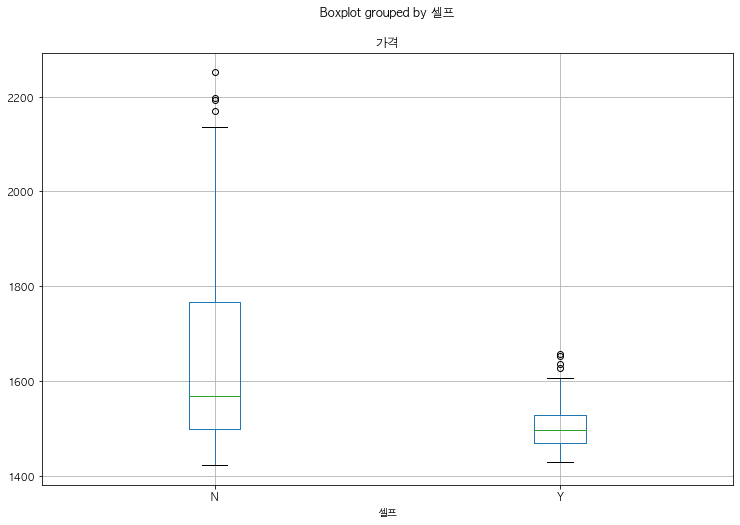

In [76]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

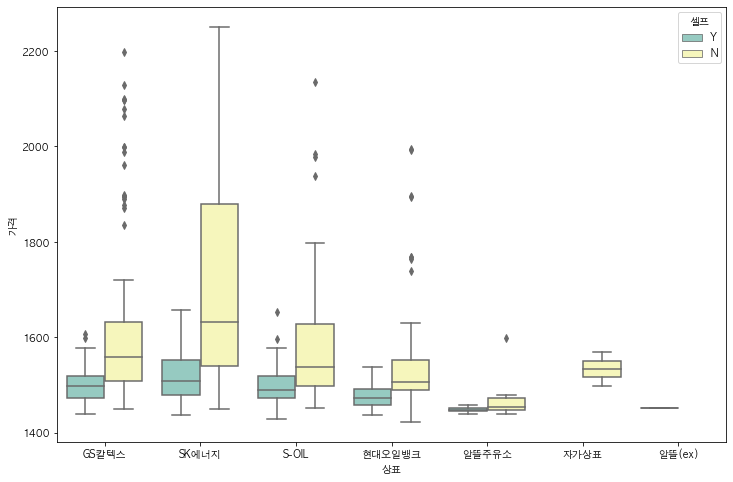

In [77]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

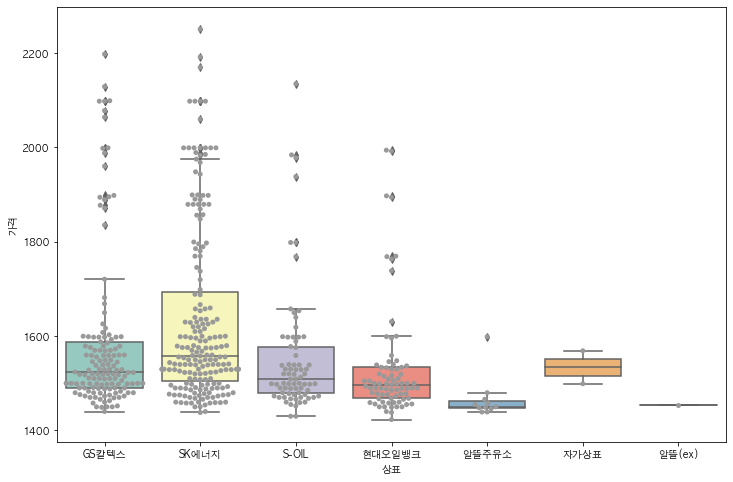

In [79]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()